In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/ML_datasets/Ecommerce Customers.csv')

In [ ]:
data.head()


,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [ ]:
data.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [ ]:
data.shape

(500, 8)

In [ ]:
data.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [ ]:
data['Avatar'].value_counts()

GreenYellow      7
Teal             7
CadetBlue        7
SlateBlue        7
Cyan             7
                ..
PapayaWhip       1
PaleTurquoise    1
Coral            1
Yellow           1
MediumPurple     1
Name: Avatar, Length: 138, dtype: int64

In [ ]:
data.isna().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [ ]:
data1 = data.iloc[:,3:]

In [ ]:
data1.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


In [ ]:
data1.describe(include='all')

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


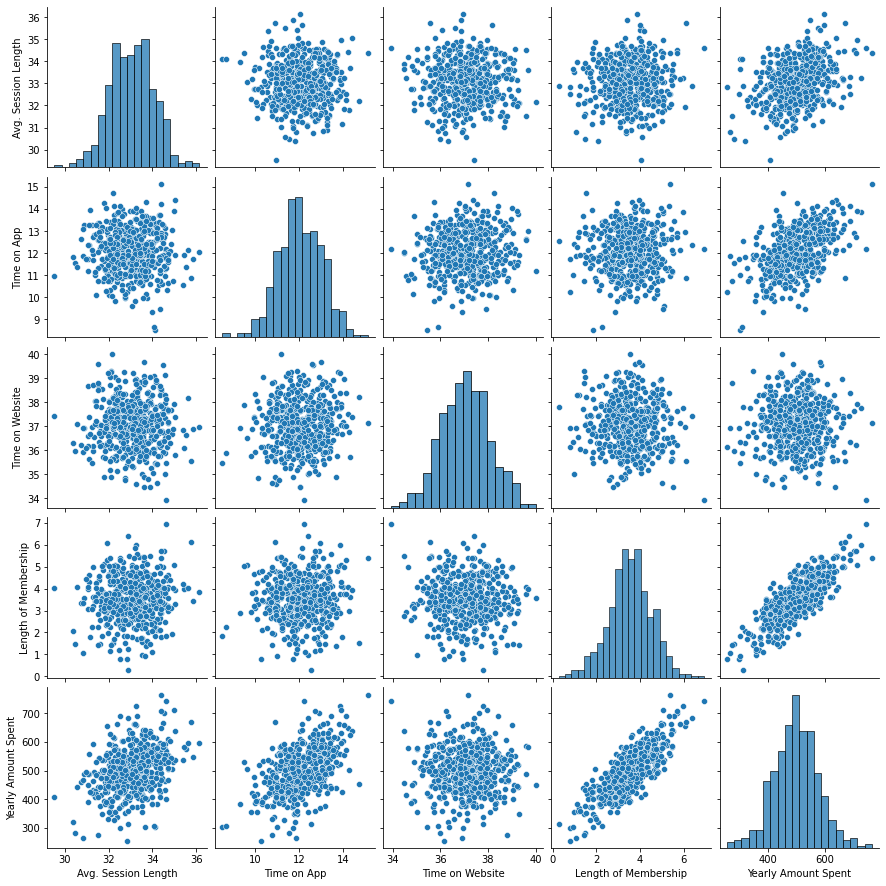

In [ ]:
sns.pairplot(data1)

Text(0.5, 1.0, 'Boxplot for E-commerce data ')

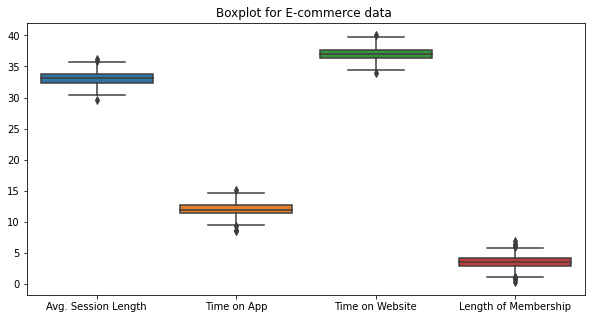

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data = data1.iloc[:,:4])
plt.title(label='Boxplot for E-commerce data ')


Text(0.5, 1.0, 'Barplot for E-commerce data ')

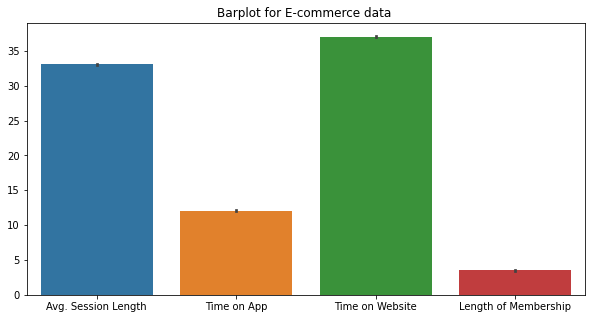

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(data = data1.iloc[:,:4])
plt.title(label='Barplot for E-commerce data ')

<Figure size 720x360 with 0 Axes>

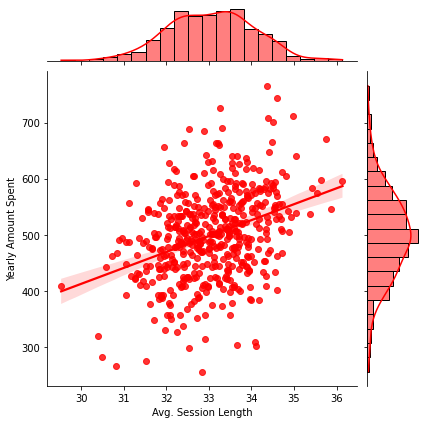

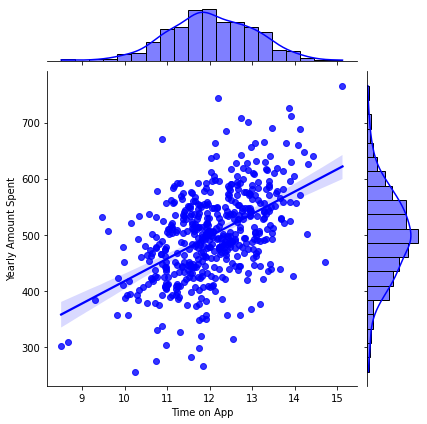

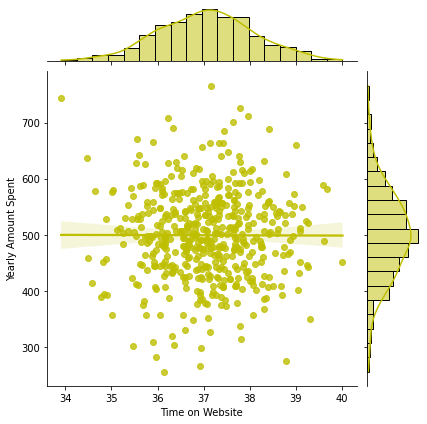

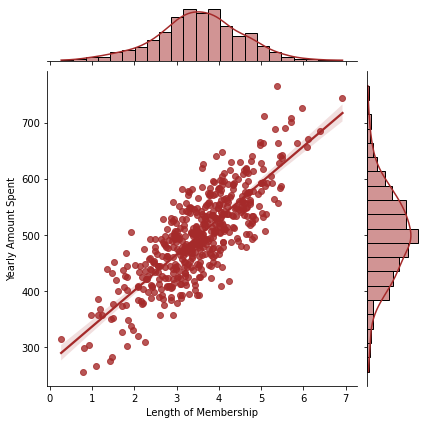

In [ ]:
plt.figure(figsize=(10,5))

sns.jointplot(x = 'Avg. Session Length',y = 'Yearly Amount Spent',data = data1,kind = 'reg',color = 'r')
sns.jointplot(x = 'Time on App',y = 'Yearly Amount Spent',data = data1,kind = 'reg',color = 'b')
sns.jointplot(x = 'Time on Website',y = 'Yearly Amount Spent',data = data1,kind = 'reg',color = 'y')
sns.jointplot(x = 'Length of Membership',y = 'Yearly Amount Spent',data = data1,kind = 'reg',color='brown')

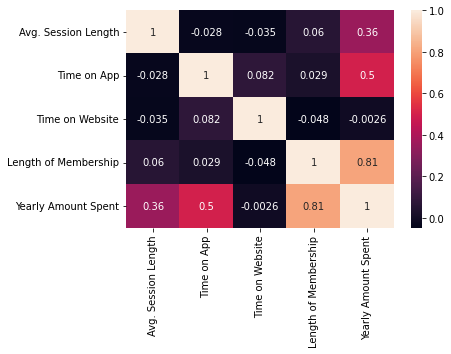

In [ ]:
sns.heatmap(data1.corr(),annot=True)

# **Data Preprocessing**

In [ ]:
X = data1.iloc[:,-2]
y = data1.iloc[:,-1]
X = np.array(X).reshape(-1,1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [ ]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = lr_model.predict(X_test)

# Metrics

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [ ]:
MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)

In [ ]:
print(MAE/100)
print(MSE/100)
print(RMSE/100)

0.39469043080581884
24.532655043245864
0.4953045027379204


Accuracy score

In [ ]:
print("Accuracy_score: ",lr_model.score(X_test,y_test))

Accuracy_score:  0.6104288691550767


# Visualizing the result

Text(0, 0.5, 'Yearly Amount Spent')

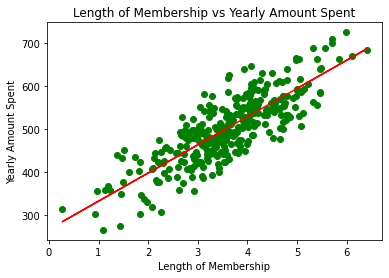

In [ ]:
plt.scatter(X_train,y_train,color = 'green')
plt.plot(X_train,lr_model.predict(X_train),color = 'red')
plt.title('Length of Membership vs Yearly Amount Spent')
plt.xlabel('Length of Membership')
plt.ylabel('Yearly Amount Spent')

Text(0, 0.5, 'Yearly Amount Spent')

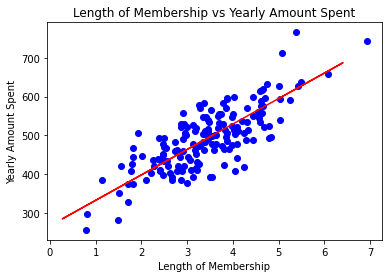

In [ ]:
plt.scatter(X_test,y_test,color = 'blue')
plt.plot(X_train,lr_model.predict(X_train),color = 'red')
plt.title('Length of Membership vs Yearly Amount Spent')
plt.xlabel('Length of Membership')
plt.ylabel('Yearly Amount Spent')